In [1]:
# Constants
TRAIN_FRACTION = 0.7
RANDOM_SEED = 86720
CV_VALIDATE_SPLIT = 5
MAX_TREE_DEPTH = 20

In [2]:
# Libraries to import
from sklearn.ensemble import RandomForestClassifier
from mlxtend.evaluate import bias_variance_decomp
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
from matplotlib import pyplot as plt
from sklearn import metrics
from sklearn import tree
import pandas as pd
import numpy as np
import matplotlib
import re

# font set for graphs
font = {'family' : 'arial',
        'weight' : 'bold',
        'size'   : 22}
matplotlib.rc('font', **font)

In [3]:
# Read Data
df = pd.read_csv(r"..\..\data\diabetes\diabetes.csv")

In [4]:
# Split into train and test
train_df = df.sample(frac=TRAIN_FRACTION,random_state=RANDOM_SEED)
train_x_df = train_df.iloc[:,:8].values
train_y_df = train_df.iloc[:,8].values

test_df = df.drop(index=train_df.index)
test_x_df = test_df.iloc[:,:8].values
test_y_df = test_df.iloc[:,8].values

In [5]:

class_weight=None
criterion = 'entropy'
splitter  = 'random'
records=[]

for depth in range(1,MAX_TREE_DEPTH+1):

    # Create a Decision Tree Classifier 
    # with a random split 
    # with the mentioned depth
    # with the entropy loss criterion
    # with the 
    dtree = DecisionTreeClassifier(random_state=RANDOM_SEED,
                                   criterion=criterion,
                                   max_depth=depth,
                                   class_weight=class_weight,
                                   splitter=splitter)

    avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(
            dtree,train_x_df, train_y_df, test_x_df, test_y_df, 
            loss='0-1_loss',
            random_seed=RANDOM_SEED)

    print('Expected loss: %.3f, Bias: %.3f, Variance: %.3f' %(avg_expected_loss,avg_bias,avg_var))
    records.append([depth,avg_expected_loss,avg_bias,avg_var])
    
dbvrsplit=pd.DataFrame.from_records(records,columns=['Depth','Loss','BiasSquare','Variance'])
dbvrsplit.to_csv('DepthBiasVarianceRandomSplit.csv',index=False)
    

Expected loss: 0.295, Bias: 0.287, Variance: 0.068
Expected loss: 0.248, Bias: 0.191, Variance: 0.154
Expected loss: 0.241, Bias: 0.204, Variance: 0.152
Expected loss: 0.233, Bias: 0.178, Variance: 0.147
Expected loss: 0.243, Bias: 0.165, Variance: 0.164
Expected loss: 0.244, Bias: 0.165, Variance: 0.170
Expected loss: 0.253, Bias: 0.152, Variance: 0.184
Expected loss: 0.264, Bias: 0.161, Variance: 0.196
Expected loss: 0.269, Bias: 0.165, Variance: 0.203
Expected loss: 0.276, Bias: 0.170, Variance: 0.212
Expected loss: 0.282, Bias: 0.178, Variance: 0.222
Expected loss: 0.287, Bias: 0.187, Variance: 0.227
Expected loss: 0.290, Bias: 0.178, Variance: 0.230
Expected loss: 0.296, Bias: 0.187, Variance: 0.237
Expected loss: 0.293, Bias: 0.191, Variance: 0.234
Expected loss: 0.296, Bias: 0.178, Variance: 0.237
Expected loss: 0.294, Bias: 0.183, Variance: 0.237
Expected loss: 0.295, Bias: 0.187, Variance: 0.236
Expected loss: 0.296, Bias: 0.187, Variance: 0.237
Expected loss: 0.296, Bias: 0.1

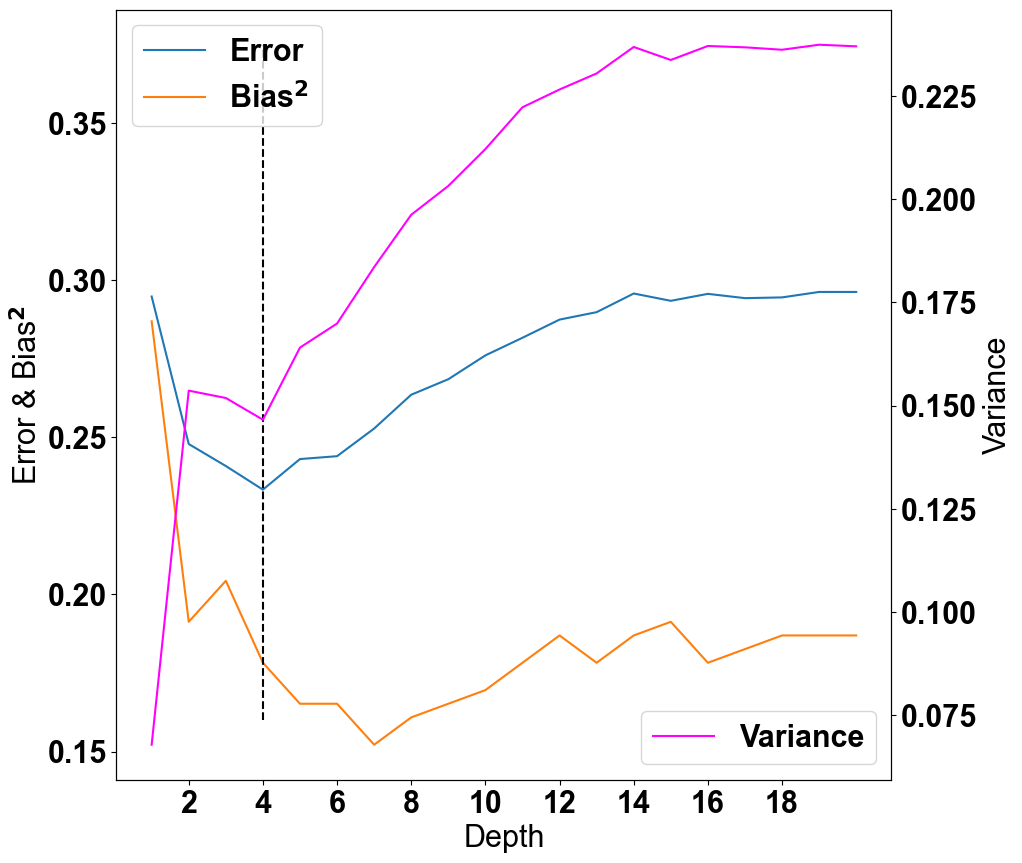

In [6]:
fig,ax1=plt.subplots()
fig.set_figwidth(10)
fig.set_figheight(10)
ax1.set_ylabel('Error & Bias${^2}$') 
ax1.set_xlabel('Depth') 
ax1.plot(dbvrsplit.iloc[:MAX_TREE_DEPTH,0],dbvrsplit.iloc[:MAX_TREE_DEPTH,1])
ax1.plot(dbvrsplit.iloc[:MAX_TREE_DEPTH,0],dbvrsplit.iloc[:MAX_TREE_DEPTH,2])
ax1.set_xticks(range(2,20,2))

ax2=ax1.twinx()
ax2.plot(dbvrsplit.iloc[:MAX_TREE_DEPTH,0],dbvrsplit.iloc[:MAX_TREE_DEPTH,3],color='magenta')
ax2.set_ylabel('Variance') 
ax1.vlines(x=4,ymin=0.160,ymax=0.375,colors='k',linestyles='dashed')
ax1.legend(['Error','Bias${^2}$'],loc='upper left')
ax2.legend(['Variance'],loc='lower right')
plt.show()

In [7]:

class_weight=None
criterion = 'entropy'
splitter  = 'best'
records=[]

for depth in range(1,MAX_TREE_DEPTH+1):

    # Create a Decision Tree Classifier 
    # with a best split 
    # with the mentioned depth
    # with the entropy loss criterion
    # with the 
    dtree = DecisionTreeClassifier(random_state=RANDOM_SEED,
                                   criterion=criterion,
                                   max_depth=depth,
                                   class_weight=class_weight,
                                   splitter=splitter)

    avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(
            dtree,train_x_df, train_y_df, test_x_df, test_y_df, 
            loss='0-1_loss',
            random_seed=RANDOM_SEED)

    print('Expected loss: %.3f, Bias: %.3f, Variance: %.3f' %(avg_expected_loss,avg_bias,avg_var))
    records.append([depth,avg_expected_loss,avg_bias,avg_var])
    
dbvbsplit=pd.DataFrame.from_records(records,columns=['Depth','Loss','BiasSquare','Variance'])
dbvbsplit.to_csv('DepthBiasVarianceBestSplit.csv',index=False)
    

Expected loss: 0.264, Bias: 0.248, Variance: 0.137
Expected loss: 0.225, Bias: 0.191, Variance: 0.109
Expected loss: 0.233, Bias: 0.200, Variance: 0.130
Expected loss: 0.242, Bias: 0.191, Variance: 0.166
Expected loss: 0.246, Bias: 0.183, Variance: 0.174
Expected loss: 0.254, Bias: 0.183, Variance: 0.189
Expected loss: 0.263, Bias: 0.170, Variance: 0.200
Expected loss: 0.267, Bias: 0.161, Variance: 0.206
Expected loss: 0.274, Bias: 0.178, Variance: 0.211
Expected loss: 0.278, Bias: 0.178, Variance: 0.214
Expected loss: 0.278, Bias: 0.191, Variance: 0.213
Expected loss: 0.279, Bias: 0.178, Variance: 0.213
Expected loss: 0.278, Bias: 0.183, Variance: 0.213
Expected loss: 0.279, Bias: 0.178, Variance: 0.213
Expected loss: 0.278, Bias: 0.178, Variance: 0.213
Expected loss: 0.279, Bias: 0.183, Variance: 0.213
Expected loss: 0.279, Bias: 0.178, Variance: 0.213
Expected loss: 0.279, Bias: 0.178, Variance: 0.213
Expected loss: 0.279, Bias: 0.183, Variance: 0.213
Expected loss: 0.279, Bias: 0.1

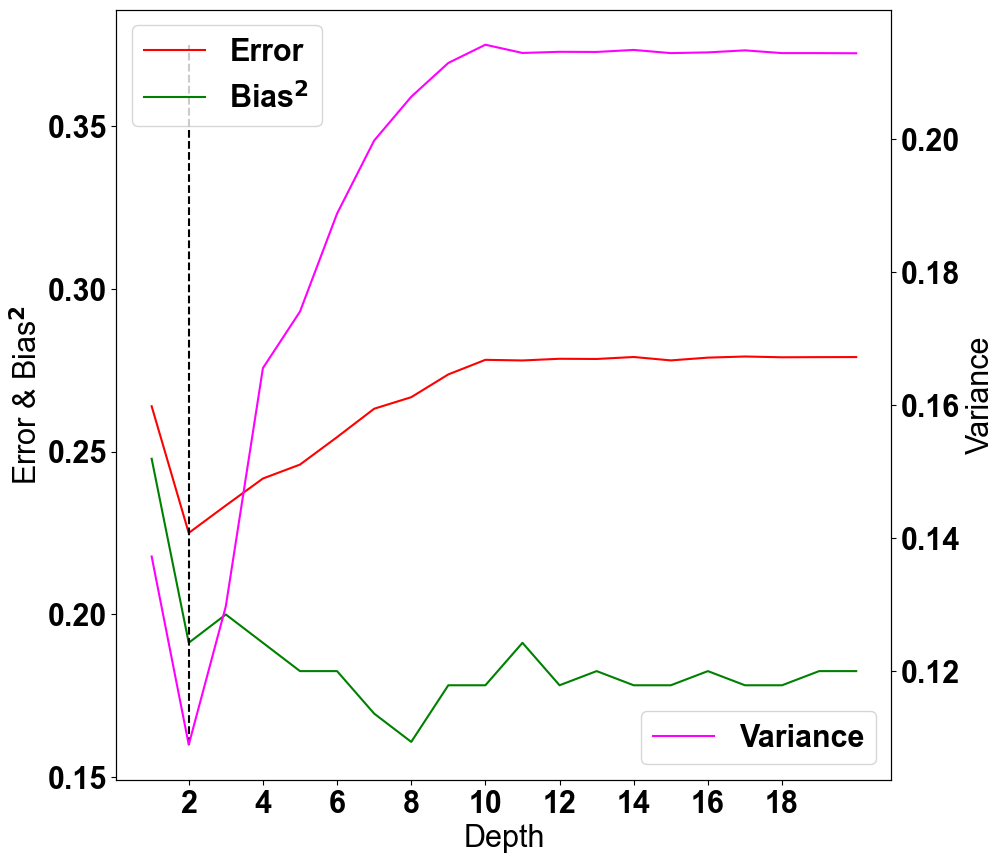

In [8]:
fig,ax1=plt.subplots()
fig.set_figwidth(10)
fig.set_figheight(10)
ax1.set_ylabel('Error & Bias${^2}$') 
ax1.set_xlabel('Depth') 
#ax1.plot(dbvrsplit.iloc[:MAX_TREE_DEPTH,0],dbvrsplit.iloc[:MAX_TREE_DEPTH,1],'--r')
#ax1.plot(dbvrsplit.iloc[:MAX_TREE_DEPTH,0],dbvrsplit.iloc[:MAX_TREE_DEPTH,2],'--g')
ax1.plot(dbvbsplit.iloc[:MAX_TREE_DEPTH,0],dbvbsplit.iloc[:MAX_TREE_DEPTH,1],'-r')
ax1.plot(dbvbsplit.iloc[:MAX_TREE_DEPTH,0],dbvbsplit.iloc[:MAX_TREE_DEPTH,2],'-g')
ax1.set_xticks(range(2,20,2))

ax2=ax1.twinx()
#ax2.plot(dbvrsplit.iloc[:MAX_TREE_DEPTH,0],dbvrsplit.iloc[:MAX_TREE_DEPTH,3],linestyle='--',color='magenta')
ax2.plot(dbvbsplit.iloc[:MAX_TREE_DEPTH,0],dbvbsplit.iloc[:MAX_TREE_DEPTH,3],color='magenta')
ax2.set_ylabel('Variance') 
ax1.vlines(x=2,ymin=0.160,ymax=0.375,colors='k',linestyles='dashed')
#ax1.legend(['Error${_{Random}}$','Bias${^2_{Random}}$','Error${_{Best}}$','Bias${^2_{Best}}$'],loc='upper left')
ax1.legend(['Error','Bias${^2}$'],loc='upper left')
#ax2.legend(['Variance${_{Random}}$','Variance${_{Best}}$'],loc='lower right')
ax2.legend(['Variance'],loc='lower right')
plt.show()

In [9]:
dtree = DecisionTreeClassifier(random_state=RANDOM_SEED,criterion=criterion,max_depth=2,class_weight=class_weight)

skf=StratifiedKFold(CV_VALIDATE_SPLIT,shuffle=True,random_state=RANDOM_SEED)
cv_fold=0
scores=[]

collect_vals_predictions = []

for tr,va in skf.split(train_x_df,train_y_df):

    dtree.fit(train_x_df[tr,:],train_y_df[tr])
    pred_test_y=dtree.predict(train_x_df[va,:])
    proba_test_y = dtree.predict_proba(train_x_df[va,:])

    Accuracy= 100*metrics.accuracy_score(train_y_df[va],pred_test_y)
    Recall=100*metrics.recall_score(train_y_df[va],pred_test_y)
    Precision= 100*metrics.precision_score(train_y_df[va],pred_test_y)
    FPR = 100*(1-metrics.recall_score(train_y_df[va],pred_test_y,pos_label=0))

    cv_fold=cv_fold+1

    print(f"Fold - {cv_fold}, Accuracy - {Accuracy}, Recall - {Recall}, Precision - {Precision}, FPR - {FPR}")
    collect_vals_predictions.append({'cv_fold':cv_fold,
                                    'validation':train_y_df[va].copy(),
                                    'model_prediction':pred_test_y,
                                    'model_probability':proba_test_y})
    scores.append([cv_fold, Accuracy, Recall, Precision, FPR])

# All the data
dtree.fit(train_x_df,train_y_df)
pred_test_y=dtree.predict(test_x_df)
proba_test_y = dtree.predict_proba(test_x_df)

Accuracy= 100*metrics.accuracy_score(test_y_df,pred_test_y)
Recall=100*metrics.recall_score(test_y_df,pred_test_y)
Precision= 100*metrics.precision_score(test_y_df,pred_test_y)
FPR = 100*(1-metrics.recall_score(test_y_df,pred_test_y,pos_label=0))

cv_fold=0

print(f"Fold - {cv_fold}, Accuracy - {Accuracy}, Recall - {Recall}, Precision - {Precision}, FPR - {FPR}")
collect_vals_predictions.append({'cv_fold':cv_fold,
                                'validation':test_y_df.copy(),
                                'model_prediction':pred_test_y,
                                'model_probability':proba_test_y})
scores.append([cv_fold, Accuracy, Recall, Precision, FPR])
scores=pd.DataFrame.from_records(scores,columns=['CV_Fold','Accuracy','Recall','Precision','FPR'])
scores.to_csv('MaxDepthBiasVarianceBestSplit_BestTree_Performance.csv')

Fold - 1, Accuracy - 75.0, Recall - 60.0, Precision - 68.57142857142857, FPR - 16.176470588235293
Fold - 2, Accuracy - 69.44444444444444, Recall - 43.90243902439025, Precision - 64.28571428571429, FPR - 14.925373134328357
Fold - 3, Accuracy - 69.44444444444444, Recall - 31.70731707317073, Precision - 72.22222222222221, FPR - 7.462686567164178
Fold - 4, Accuracy - 70.09345794392523, Recall - 30.0, Precision - 75.0, FPR - 5.970149253731338
Fold - 5, Accuracy - 72.89719626168224, Recall - 35.0, Precision - 82.35294117647058, FPR - 4.477611940298509
Fold - 0, Accuracy - 79.13043478260869, Recall - 37.878787878787875, Precision - 78.125, FPR - 4.268292682926833


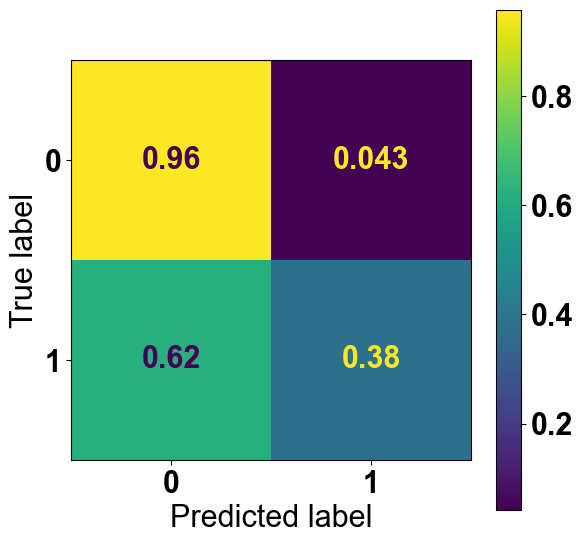

In [10]:
fig=plt.figure(figsize=[5,5])
ax = fig.add_axes([0,0,1,1])
metrics.ConfusionMatrixDisplay.from_predictions(test_y_df,pred_test_y,normalize='true',ax=ax)

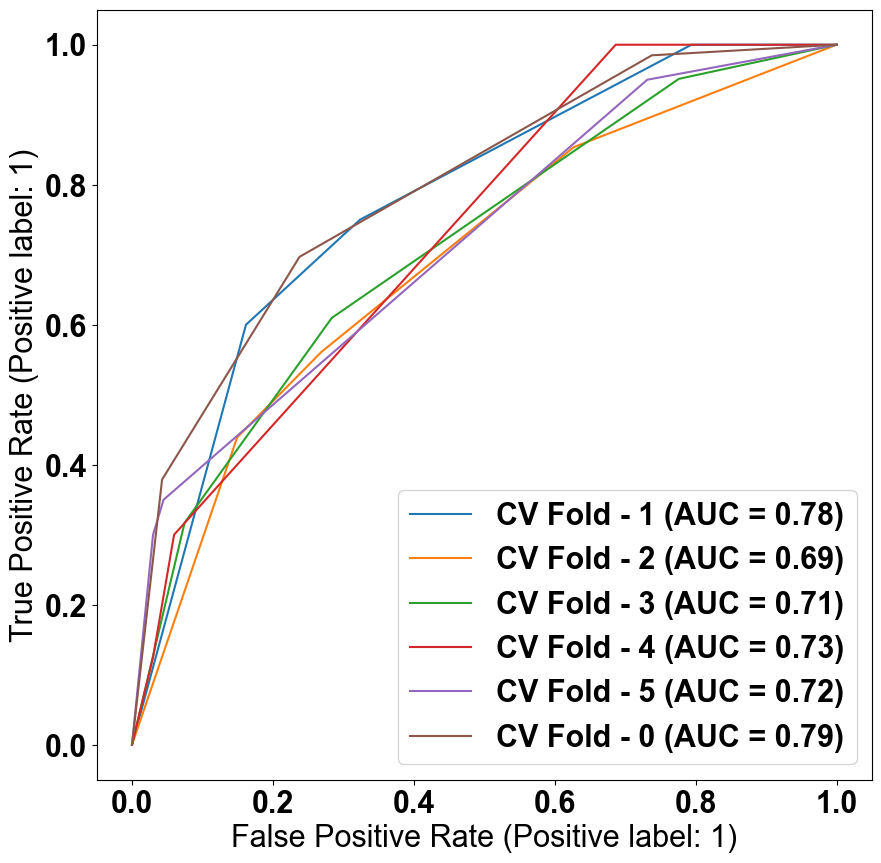

In [11]:
fig,ax=plt.subplots()
fig.set_figwidth(10)
fig.set_figheight(10)
leg=[]
for val in collect_vals_predictions:
    label='CV Fold - %d'%(val['cv_fold'])
    rocDisplay = metrics.RocCurveDisplay.from_predictions(val['validation'],
                                                          val['model_probability'][:,1],
                                                          name=label,
                                                          ax=ax)

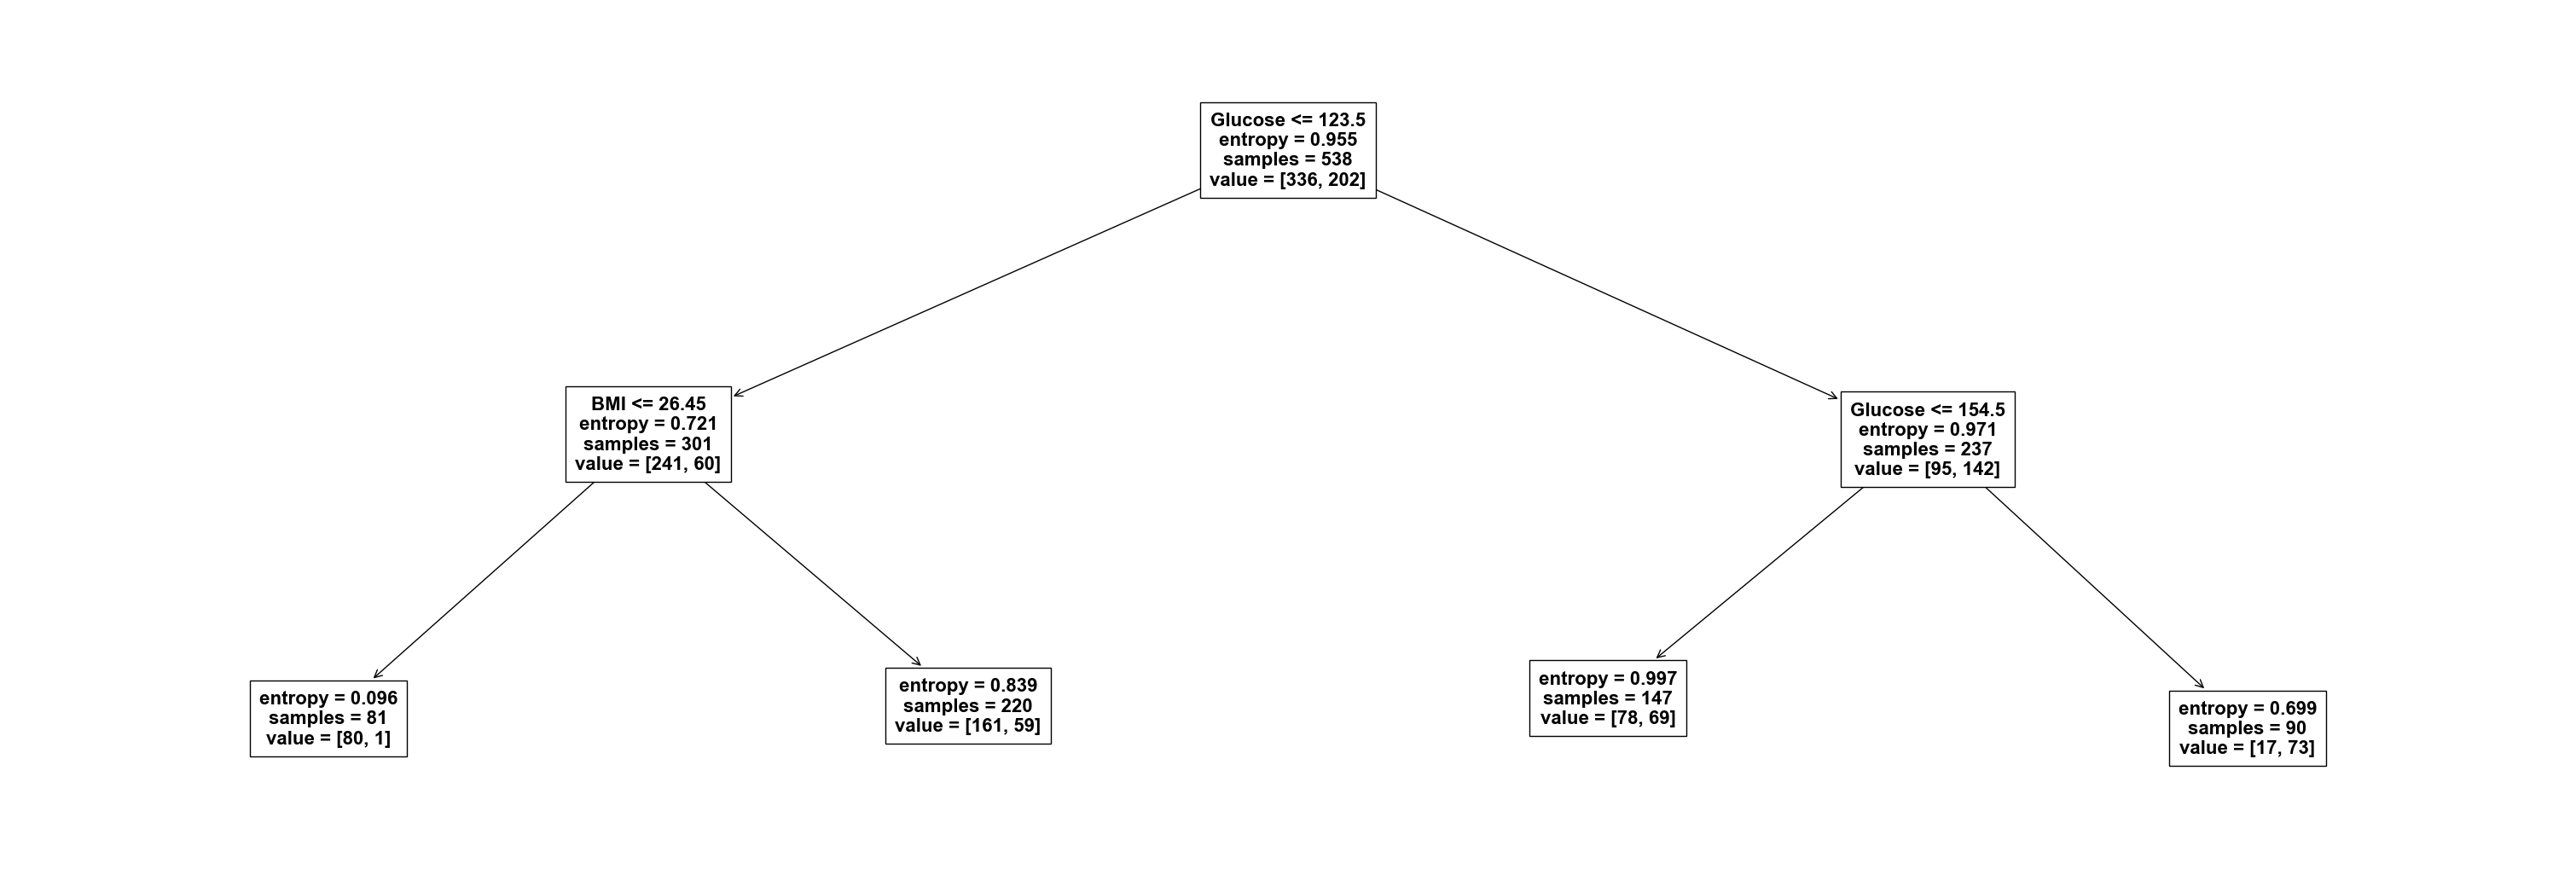

In [12]:
fig=plt.figure(figsize=[30,10])
ax=fig.add_axes([0,0,1,1])
txt=tree.plot_tree(dtree,fontsize=8,proportion=False,ax=ax)
ycollect=[]
sign=1
for tx in txt:
    tx.set_text(tx.get_text().replace('x[1]',train_df.columns[1]))
    tx.set_text(tx.get_text().replace('x[5]',train_df.columns[5]))
    tx.set_text(tx.get_text().replace('x[7]',train_df.columns[7]))
    tx.set_text(tx.get_text().replace('x[0]',train_df.columns[0]))
    #tx.set_text(re.sub('\nvalue .*','',tx.get_text()))
    cur_y=tx._y
    if(cur_y in ycollect):
        tx.set_y(cur_y+sign*np.random.rand()*0.05)
        sign=sign*-1
        ycollect.append(tx._y)
    else:
        ycollect.append(cur_y)
    tx.set_fontsize(16)
plt.savefig('optimal_tree_depth_2.svg',format='svg')
plt.show()

In [13]:
class_weight=None
criterion = 'entropy'
splitter  = 'random'
records=[]

samples_leaf=np.linspace(0.001,0.5,50)

for min_samples_leaf in samples_leaf:

    # Create a Decision Tree Classifier 
    # with a random split 
    # with the mentioned number of leaf samples
    # with the entropy loss criterion
    # with the 
    dtree = DecisionTreeClassifier(random_state=RANDOM_SEED,
                                   criterion=criterion,
                                   min_samples_leaf=min_samples_leaf,
                                   class_weight=class_weight,
                                   splitter=splitter)

    avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(
            dtree,train_x_df, train_y_df, test_x_df, test_y_df, 
            loss='0-1_loss',
            random_seed=RANDOM_SEED)

    print('Expected loss: %.3f, Bias: %.3f, Variance: %.3f' %(avg_expected_loss,avg_bias,avg_var))
    records.append([min_samples_leaf,avg_expected_loss,avg_bias,avg_var])
    
minlsbvrsplit=pd.DataFrame.from_records(records,columns=['MinLeafSize','Loss','BiasSquare','Variance'])
minlsbvrsplit.to_csv('MinLeafSizeBiasVarianceRandomSplit.csv',index=False)
    

Expected loss: 0.296, Bias: 0.187, Variance: 0.237
Expected loss: 0.265, Bias: 0.165, Variance: 0.201
Expected loss: 0.248, Bias: 0.157, Variance: 0.178
Expected loss: 0.242, Bias: 0.174, Variance: 0.169
Expected loss: 0.247, Bias: 0.187, Variance: 0.165
Expected loss: 0.253, Bias: 0.200, Variance: 0.167
Expected loss: 0.264, Bias: 0.183, Variance: 0.181
Expected loss: 0.271, Bias: 0.170, Variance: 0.196
Expected loss: 0.268, Bias: 0.200, Variance: 0.195
Expected loss: 0.272, Bias: 0.226, Variance: 0.195
Expected loss: 0.274, Bias: 0.235, Variance: 0.195
Expected loss: 0.276, Bias: 0.252, Variance: 0.195
Expected loss: 0.275, Bias: 0.243, Variance: 0.194
Expected loss: 0.275, Bias: 0.252, Variance: 0.190
Expected loss: 0.277, Bias: 0.248, Variance: 0.187
Expected loss: 0.284, Bias: 0.248, Variance: 0.176
Expected loss: 0.291, Bias: 0.248, Variance: 0.164
Expected loss: 0.292, Bias: 0.278, Variance: 0.159
Expected loss: 0.292, Bias: 0.287, Variance: 0.150
Expected loss: 0.291, Bias: 0.2

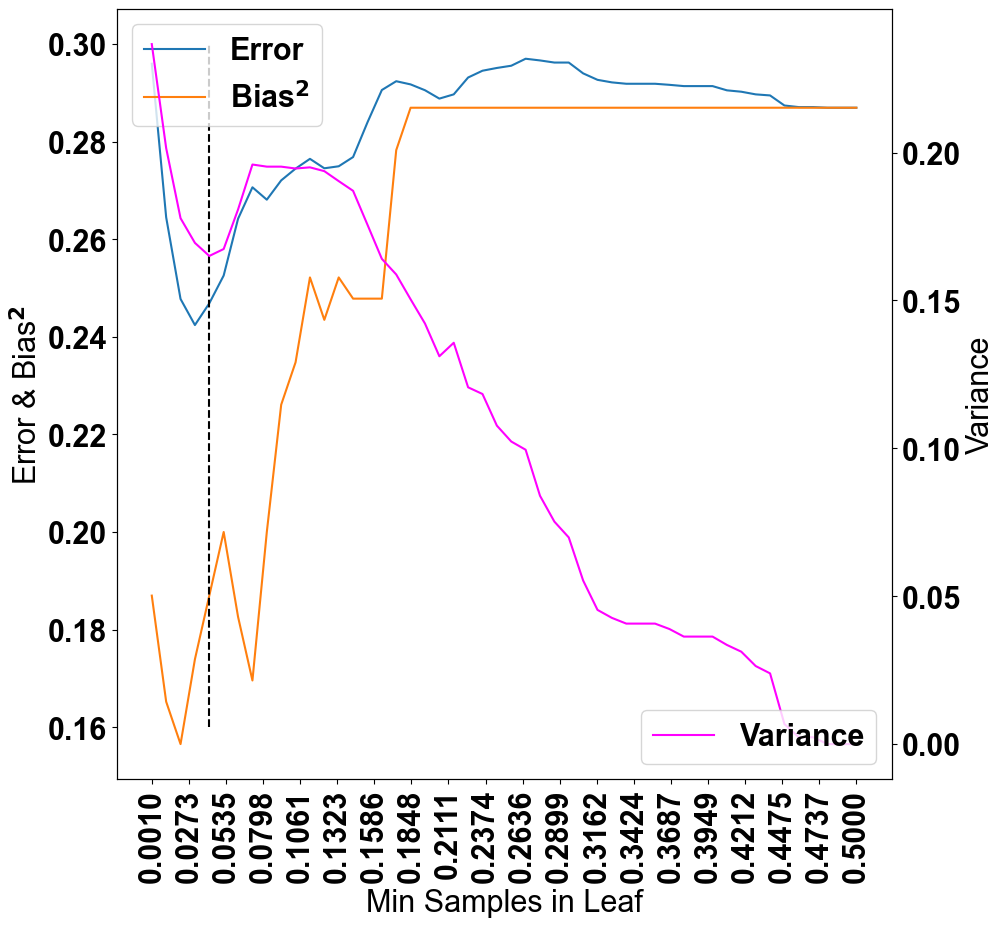

In [14]:
fig,ax1=plt.subplots()
fig.set_figwidth(10)
fig.set_figheight(10)
ax1.set_ylabel('Error & Bias${^2}$') 
ax1.set_xlabel('Min Samples in Leaf') 
ax1.plot(minlsbvrsplit.iloc[:,0],minlsbvrsplit.iloc[:,1])
ax1.plot(minlsbvrsplit.iloc[:,0],minlsbvrsplit.iloc[:,2])
ax1.set_xticks(np.linspace(0.001,0.5,20))
ax1.tick_params(axis='x',labelrotation=90)

ax2=ax1.twinx()
ax2.plot(minlsbvrsplit.iloc[:,0],minlsbvrsplit.iloc[:,3],color='magenta')
ax2.set_ylabel('Variance') 
ax1.vlines(x=.04173469387755102,ymin=0.160,ymax=0.3,colors='k',linestyles='dashed')
ax1.legend(['Error','Bias${^2}$'],loc='upper left')
ax2.legend(['Variance'],loc='lower right')
plt.show()

In [15]:
class_weight=None
criterion = 'entropy'
splitter  = 'best'
records=[]

samples_leaf=np.linspace(0.001,0.5,50)

for min_samples_leaf in samples_leaf:

    # Create a Decision Tree Classifier 
    # with a best split 
    # with the mentioned number of leaf samples
    # with the entropy loss criterion
    # with the 
    dtree = DecisionTreeClassifier(random_state=RANDOM_SEED,
                                   criterion=criterion,
                                   min_samples_leaf=min_samples_leaf,
                                   class_weight=class_weight,
                                   splitter=splitter)

    avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(
            dtree,train_x_df, train_y_df, test_x_df, test_y_df, 
            loss='0-1_loss',
            random_seed=RANDOM_SEED)

    print('Expected loss: %.3f, Bias: %.3f, Variance: %.3f' %(avg_expected_loss,avg_bias,avg_var))
    records.append([min_samples_leaf,avg_expected_loss,avg_bias,avg_var])
    
minlsbvbsplit=pd.DataFrame.from_records(records,columns=['MinLeafSize','Loss','BiasSquare','Variance'])
minlsbvbsplit.to_csv('MinLeafSizeBiasVarianceBestSplit.csv',index=False)
    

Expected loss: 0.279, Bias: 0.183, Variance: 0.213
Expected loss: 0.269, Bias: 0.161, Variance: 0.204
Expected loss: 0.251, Bias: 0.170, Variance: 0.184
Expected loss: 0.243, Bias: 0.174, Variance: 0.173
Expected loss: 0.234, Bias: 0.178, Variance: 0.161
Expected loss: 0.231, Bias: 0.187, Variance: 0.156
Expected loss: 0.228, Bias: 0.204, Variance: 0.148
Expected loss: 0.225, Bias: 0.191, Variance: 0.141
Expected loss: 0.221, Bias: 0.187, Variance: 0.130
Expected loss: 0.219, Bias: 0.187, Variance: 0.124
Expected loss: 0.218, Bias: 0.187, Variance: 0.118
Expected loss: 0.218, Bias: 0.191, Variance: 0.114
Expected loss: 0.219, Bias: 0.191, Variance: 0.111
Expected loss: 0.223, Bias: 0.191, Variance: 0.111
Expected loss: 0.227, Bias: 0.200, Variance: 0.116
Expected loss: 0.229, Bias: 0.196, Variance: 0.121
Expected loss: 0.228, Bias: 0.191, Variance: 0.118
Expected loss: 0.231, Bias: 0.187, Variance: 0.120
Expected loss: 0.230, Bias: 0.191, Variance: 0.113
Expected loss: 0.230, Bias: 0.1

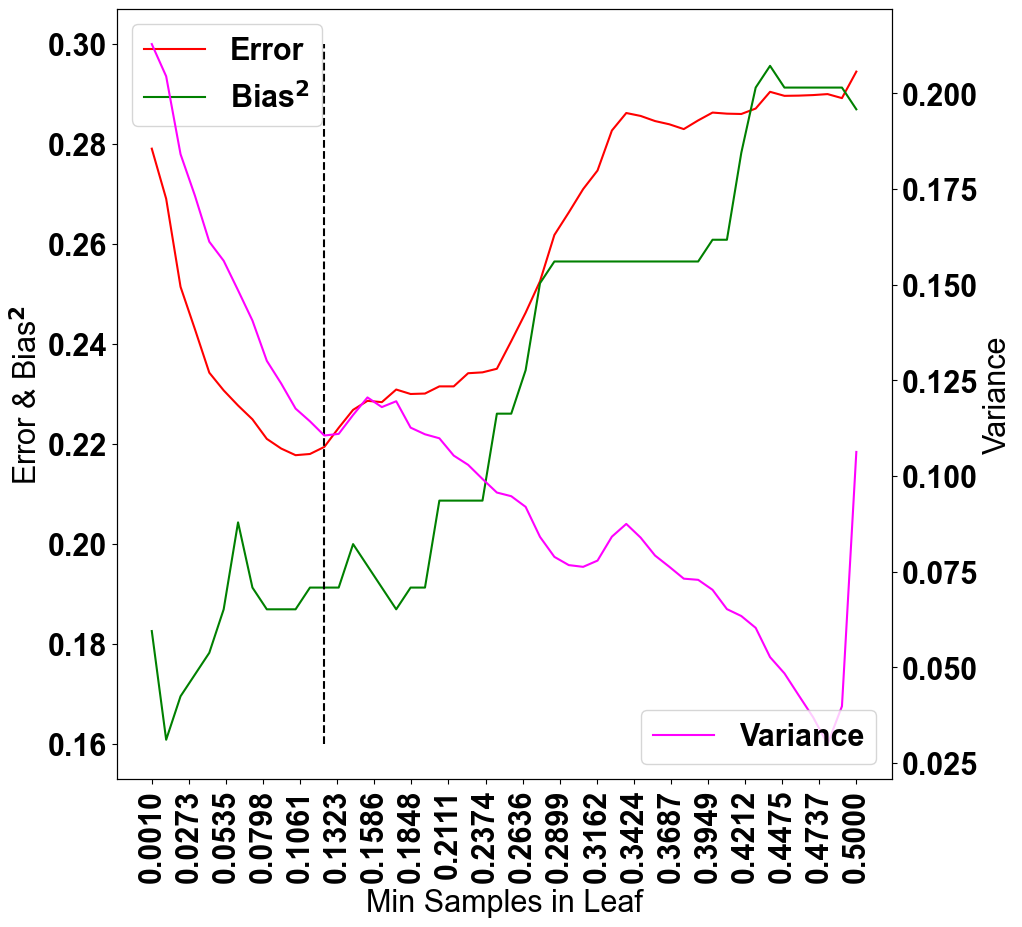

In [16]:
fig,ax1=plt.subplots()
fig.set_figwidth(10)
fig.set_figheight(10)
ax1.set_ylabel('Error & Bias${^2}$') 
ax1.set_xlabel('Min Samples in Leaf') 
#ax1.plot(minlsbvrsplit.iloc[:,0],minlsbvrsplit.iloc[:,1],'--r')
#ax1.plot(minlsbvrsplit.iloc[:,0],minlsbvrsplit.iloc[:,2],'--g')
ax1.plot(minlsbvbsplit.iloc[:,0],minlsbvbsplit.iloc[:,1],'-r')
ax1.plot(minlsbvbsplit.iloc[:,0],minlsbvbsplit.iloc[:,2],'-g')
ax1.set_xticks(np.linspace(0.001,0.5,20))
ax1.tick_params(axis='x',labelrotation=90)

ax2=ax1.twinx()
#ax2.plot(minlsbvrsplit.iloc[:,0],minlsbvrsplit.iloc[:,3],linestyle='--',color='magenta')
ax2.plot(minlsbvbsplit.iloc[:,0],minlsbvbsplit.iloc[:,3],color='magenta')
ax2.set_ylabel('Variance') 
ax1.vlines(x=0.12320408163265306,ymin=0.160,ymax=0.3,colors='k',linestyles='dashed')
ax1.legend(['Error','Bias${^2}$'],loc='upper left')
ax2.legend(['Variance'],loc='lower right')
#ax1.legend(['Error${_{Random}}$','Bias${^2_{Random}}$','Error${_{Best}}$','Bias${^2_{Best}}$'],loc='upper left')
#ax2.legend(['Variance${_{Random}}$','Variance${_{Best}}$'],loc='lower right')
plt.show()

In [17]:
dtree = DecisionTreeClassifier(random_state=RANDOM_SEED,criterion=criterion,min_samples_leaf=0.1232,class_weight=class_weight)

skf=StratifiedKFold(CV_VALIDATE_SPLIT,shuffle=True,random_state=RANDOM_SEED)
cv_fold=0
scores=[]

collect_vals_predictions = []

for tr,va in skf.split(train_x_df,train_y_df):

    dtree.fit(train_x_df[tr,:],train_y_df[tr])
    pred_test_y=dtree.predict(train_x_df[va,:])
    proba_test_y = dtree.predict_proba(train_x_df[va,:])

    Accuracy= 100*metrics.accuracy_score(train_y_df[va],pred_test_y)
    Recall=100*metrics.recall_score(train_y_df[va],pred_test_y)
    Precision= 100*metrics.precision_score(train_y_df[va],pred_test_y)
    FPR = 100*(1-metrics.recall_score(train_y_df[va],pred_test_y,pos_label=0))

    cv_fold=cv_fold+1

    print(f"Fold - {cv_fold}, Accuracy - {Accuracy}, Recall - {Recall}, Precision - {Precision}, FPR - {FPR}")
    collect_vals_predictions.append({'cv_fold':cv_fold,
                                    'validation':train_y_df[va].copy(),
                                    'model_prediction':pred_test_y,
                                    'model_probability':proba_test_y})
    scores.append([cv_fold, Accuracy, Recall, Precision, FPR])

# All the data
dtree.fit(train_x_df,train_y_df)
pred_test_y=dtree.predict(test_x_df)
proba_test_y = dtree.predict_proba(test_x_df)

Accuracy= 100*metrics.accuracy_score(test_y_df,pred_test_y)
Recall=100*metrics.recall_score(test_y_df,pred_test_y)
Precision= 100*metrics.precision_score(test_y_df,pred_test_y)
FPR = 100*(1-metrics.recall_score(test_y_df,pred_test_y,pos_label=0))

cv_fold=0

print(f"Fold - {cv_fold}, Accuracy - {Accuracy}, Recall - {Recall}, Precision - {Precision}, FPR - {FPR}")
collect_vals_predictions.append({'cv_fold':cv_fold,
                                'validation':test_y_df.copy(),
                                'model_prediction':pred_test_y,
                                'model_probability':proba_test_y})
scores.append([cv_fold, Accuracy, Recall, Precision, FPR])
scores=pd.DataFrame.from_records(scores,columns=['CV_Fold','Accuracy','Recall','Precision','FPR'])
scores.to_csv('MinLeafSizeBiasVarianceBestSplit_BestTree_Performance.csv')

Fold - 1, Accuracy - 75.0, Recall - 60.0, Precision - 68.57142857142857, FPR - 16.176470588235293
Fold - 2, Accuracy - 69.44444444444444, Recall - 43.90243902439025, Precision - 64.28571428571429, FPR - 14.925373134328357
Fold - 3, Accuracy - 69.44444444444444, Recall - 31.70731707317073, Precision - 72.22222222222221, FPR - 7.462686567164178
Fold - 4, Accuracy - 68.22429906542055, Recall - 50.0, Precision - 58.82352941176471, FPR - 20.895522388059707
Fold - 5, Accuracy - 76.63551401869158, Recall - 65.0, Precision - 70.27027027027027, FPR - 16.417910447761198
Fold - 0, Accuracy - 78.26086956521739, Recall - 54.54545454545454, Precision - 64.28571428571429, FPR - 12.195121951219512


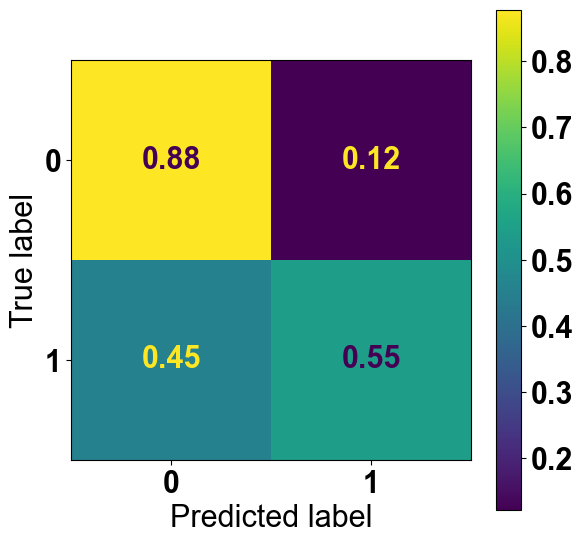

In [18]:
fig=plt.figure(figsize=[5,5])
ax = fig.add_axes([0,0,1,1])
metrics.ConfusionMatrixDisplay.from_predictions(test_y_df,pred_test_y,normalize='true',ax=ax)

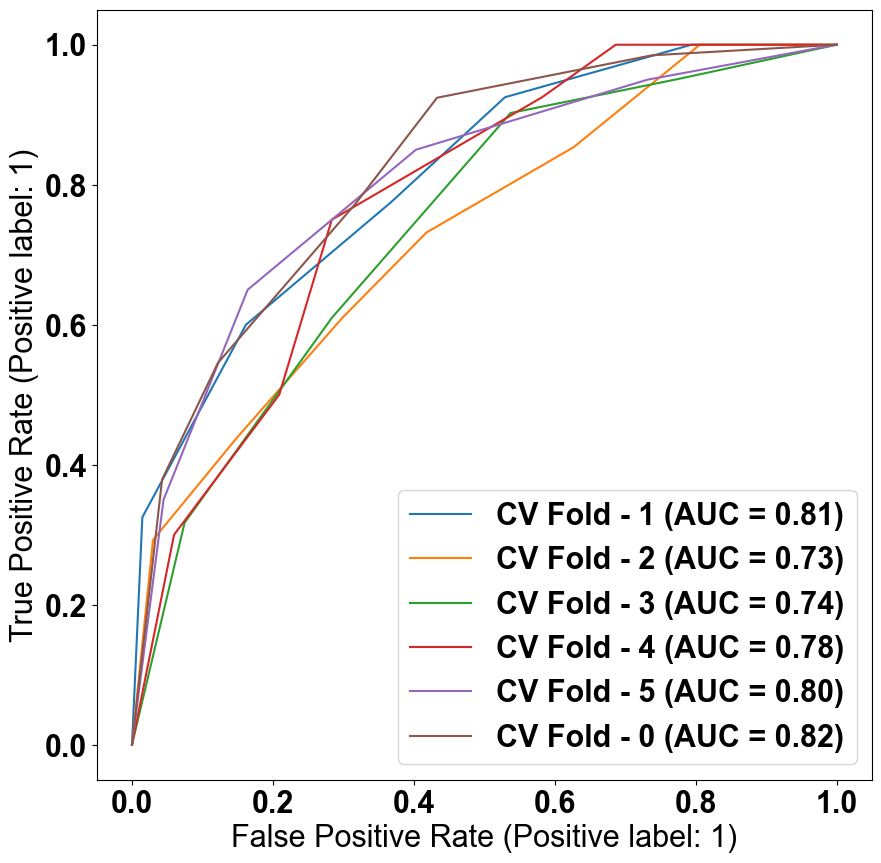

In [19]:
fig,ax=plt.subplots()
fig.set_figwidth(10)
fig.set_figheight(10)
leg=[]
for val in collect_vals_predictions:
    label='CV Fold - %d'%(val['cv_fold'])
    rocDisplay = metrics.RocCurveDisplay.from_predictions(val['validation'],
                                                          val['model_probability'][:,1],
                                                          name=label,
                                                          ax=ax)

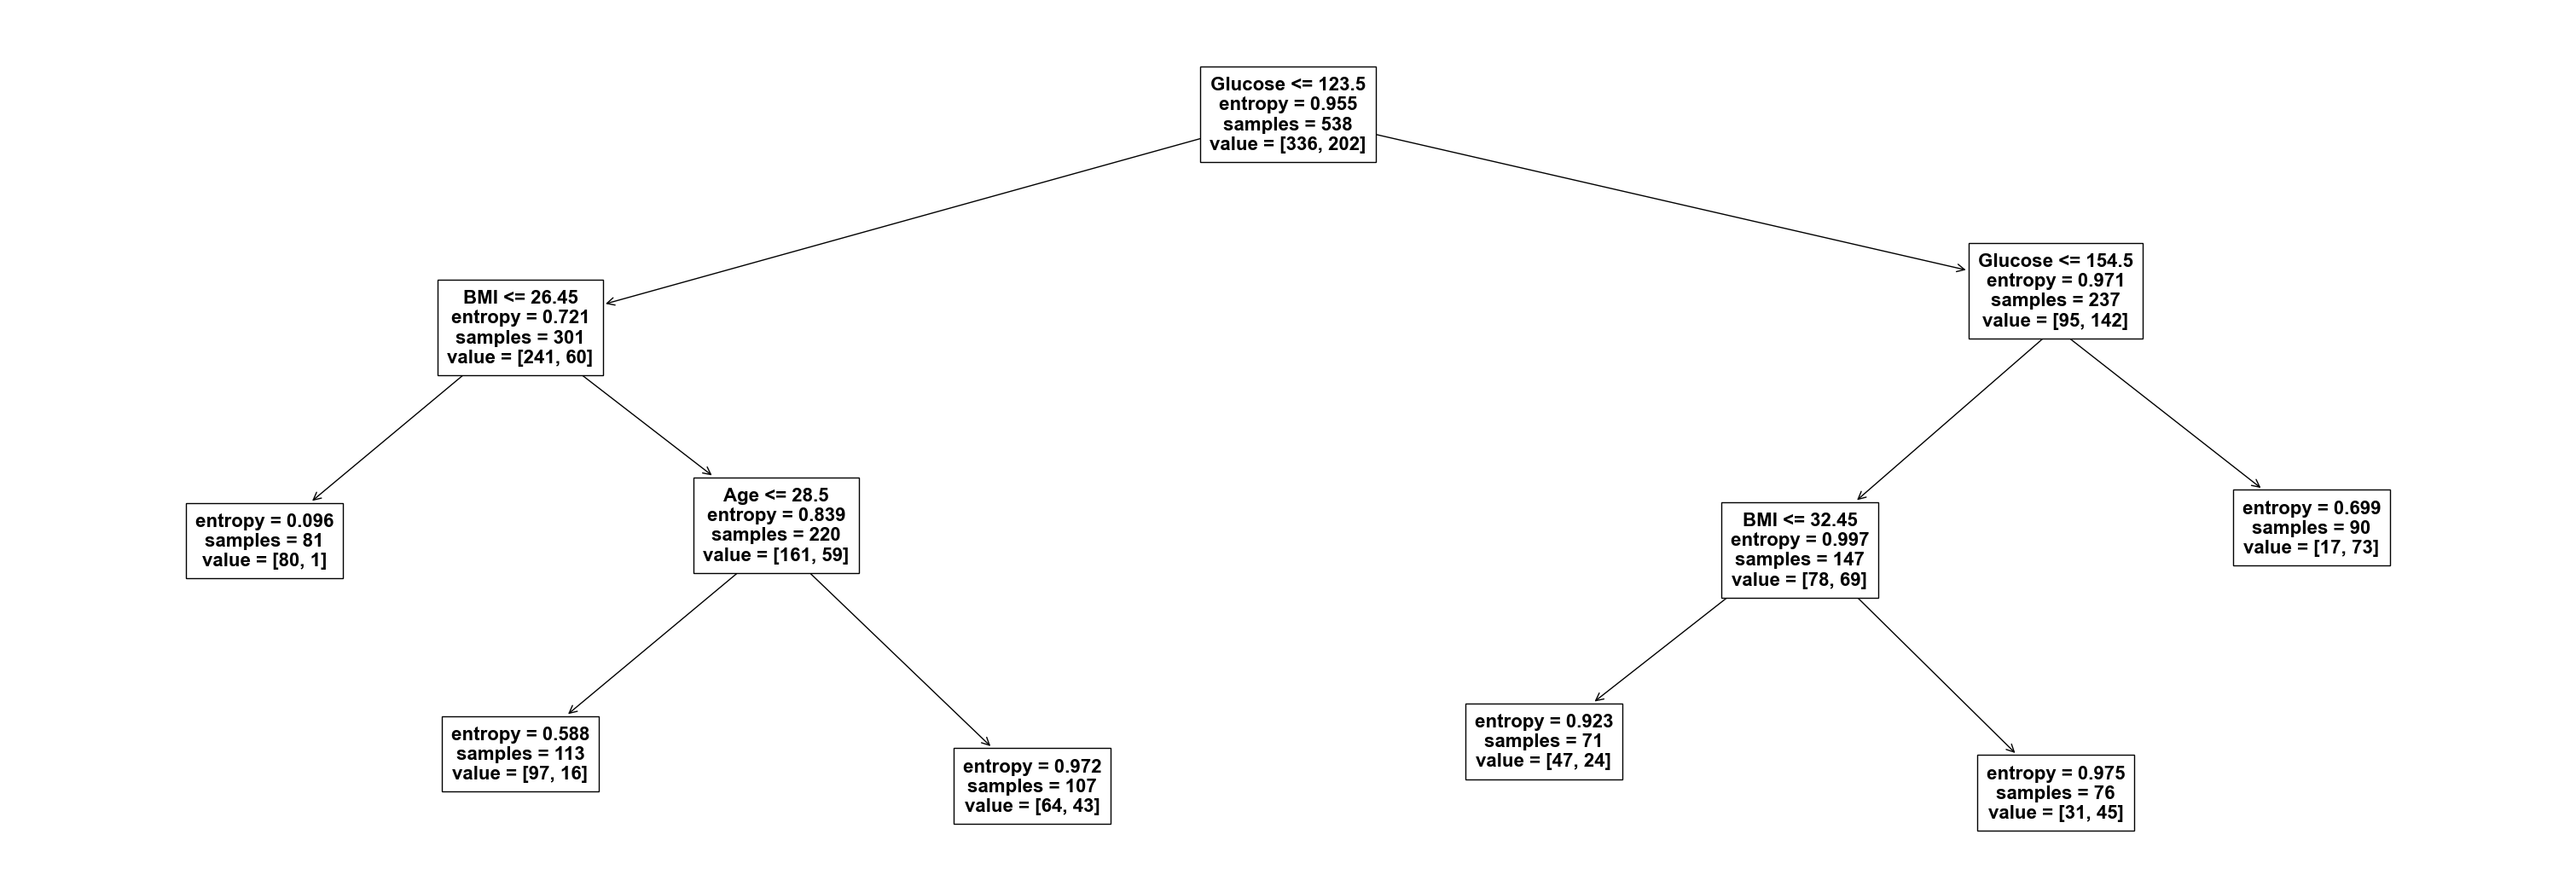

In [20]:
fig=plt.figure(figsize=[30,10])
ax=fig.add_axes([0,0,1,1])
txt=tree.plot_tree(dtree,fontsize=8,proportion=False,ax=ax)
ycollect=[]
sign=1
for tx in txt:
    tx.set_text(tx.get_text().replace('x[1]',train_df.columns[1]))
    tx.set_text(tx.get_text().replace('x[5]',train_df.columns[5]))
    tx.set_text(tx.get_text().replace('x[7]',train_df.columns[7]))
    tx.set_text(tx.get_text().replace('x[0]',train_df.columns[0]))
    #tx.set_text(re.sub('\nvalue .*','',tx.get_text()))
    cur_y=tx._y
    if(cur_y in ycollect):
        tx.set_y(cur_y+sign*np.random.rand()*0.05)
        sign=sign*-1
        ycollect.append(tx._y)
    else:
        ycollect.append(cur_y)
    tx.set_fontsize(16)
plt.savefig('optimal_tree_depth_3.svg',format='svg')
plt.show()

In [21]:

class_weight='balanced'
criterion = 'entropy'
splitter  = 'best'
records=[]

samples_leaf=np.linspace(0.001,0.5,50)

for min_samples_leaf in samples_leaf:

    # Create a Decision Tree Classifier 
    # with a best split 
    # with the mentioned number of leaf samples
    # with the entropy loss criterion
    # with the 
    dtree = DecisionTreeClassifier(random_state=RANDOM_SEED,
                                   criterion=criterion,
                                   min_samples_leaf=min_samples_leaf,
                                   class_weight=class_weight,
                                   splitter=splitter)

    avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(
            dtree,train_x_df, train_y_df, test_x_df, test_y_df, 
            loss='0-1_loss',
            random_seed=RANDOM_SEED)

    print('Expected loss: %.3f, Bias: %.3f, Variance: %.3f' %(avg_expected_loss,avg_bias,avg_var))
    records.append([min_samples_leaf,avg_expected_loss,avg_bias,avg_var])
    
minlsbvbbsplit=pd.DataFrame.from_records(records,columns=['MinLeafSize','Loss','BiasSquare','Variance'])
minlsbvbbsplit.to_csv('MinLeafSizeBiasVarianceBalancedBestSplit.csv',index=False)

Expected loss: 0.278, Bias: 0.170, Variance: 0.211
Expected loss: 0.282, Bias: 0.187, Variance: 0.210
Expected loss: 0.277, Bias: 0.213, Variance: 0.194
Expected loss: 0.273, Bias: 0.217, Variance: 0.180
Expected loss: 0.271, Bias: 0.213, Variance: 0.167
Expected loss: 0.266, Bias: 0.222, Variance: 0.157
Expected loss: 0.261, Bias: 0.217, Variance: 0.152
Expected loss: 0.261, Bias: 0.226, Variance: 0.147
Expected loss: 0.264, Bias: 0.239, Variance: 0.148
Expected loss: 0.262, Bias: 0.239, Variance: 0.144
Expected loss: 0.262, Bias: 0.239, Variance: 0.140
Expected loss: 0.263, Bias: 0.243, Variance: 0.141
Expected loss: 0.266, Bias: 0.235, Variance: 0.146
Expected loss: 0.266, Bias: 0.230, Variance: 0.146
Expected loss: 0.266, Bias: 0.230, Variance: 0.142
Expected loss: 0.266, Bias: 0.230, Variance: 0.138
Expected loss: 0.270, Bias: 0.235, Variance: 0.134
Expected loss: 0.274, Bias: 0.243, Variance: 0.130
Expected loss: 0.271, Bias: 0.239, Variance: 0.117
Expected loss: 0.276, Bias: 0.2

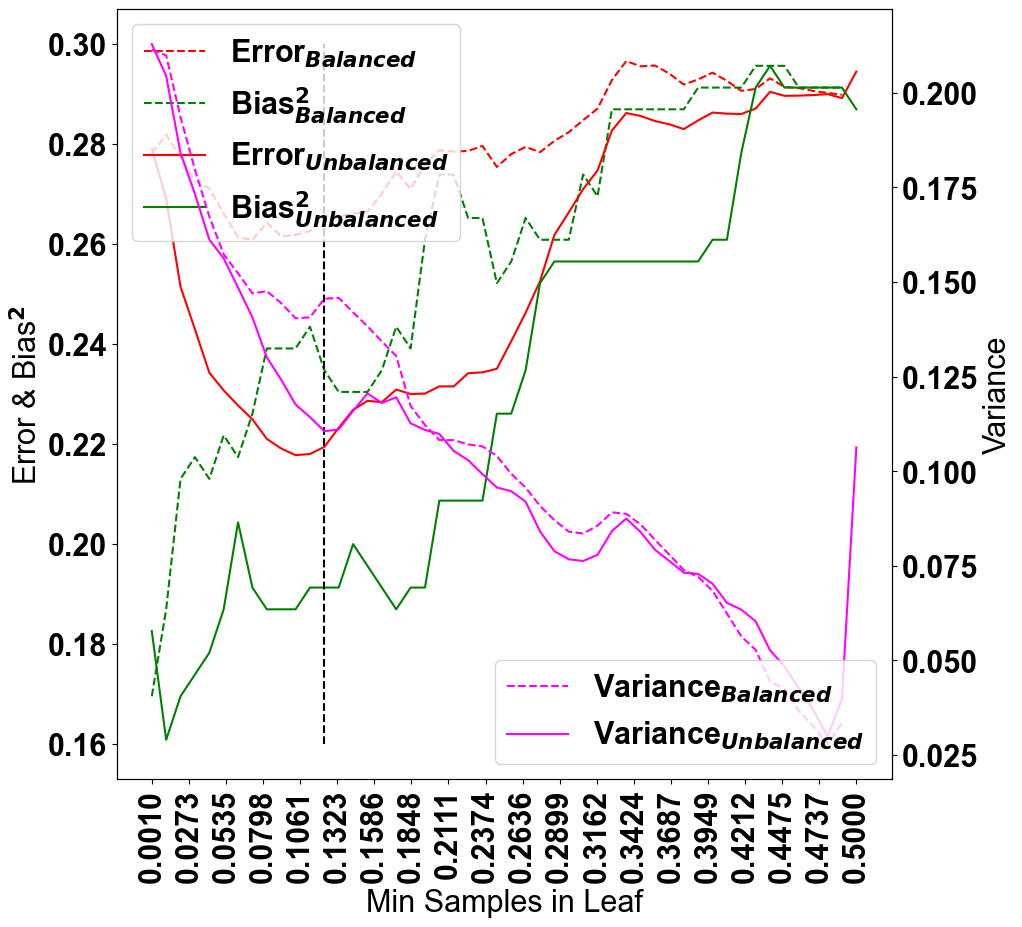

In [22]:
fig,ax1=plt.subplots()
fig.set_figwidth(10)
fig.set_figheight(10)
ax1.set_ylabel('Error & Bias${^2}$') 
ax1.set_xlabel('Min Samples in Leaf') 
ax1.plot(minlsbvbbsplit.iloc[:-1,0],minlsbvbbsplit.iloc[:-1,1],'--r')
ax1.plot(minlsbvbbsplit.iloc[:-1,0],minlsbvbbsplit.iloc[:-1,2],'--g')
ax1.plot(minlsbvbsplit.iloc[:,0],minlsbvbsplit.iloc[:,1],'-r')
ax1.plot(minlsbvbsplit.iloc[:,0],minlsbvbsplit.iloc[:,2],'-g')
ax1.set_xticks(np.linspace(0.001,0.5,20))
ax1.tick_params(axis='x',labelrotation=90)

ax2=ax1.twinx()
ax2.plot(minlsbvbbsplit.iloc[:-1,0],minlsbvbbsplit.iloc[:-1,3],linestyle='--',color='magenta')
ax2.plot(minlsbvbsplit.iloc[:,0],minlsbvbsplit.iloc[:,3],color='magenta')
ax2.set_ylabel('Variance') 
ax1.vlines(x=0.12320408163265306,ymin=0.160,ymax=0.3,colors='k',linestyles='dashed')
ax1.legend(['Error${_{Balanced}}$','Bias${^2_{Balanced}}$','Error${_{Unbalanced}}$','Bias${^2_{Unbalanced}}$'],loc='upper left')
ax2.legend(['Variance${_{Balanced}}$','Variance${_{Unbalanced}}$'],loc='lower right')
plt.show()

In [23]:
class_weight=None
criterion = 'entropy'
n_estimators = 100
records=[]

samples_leaf=np.linspace(0.001,0.5,50)

for min_samples_leaf in samples_leaf:

    # Create a Decision Tree Classifier 
    # with a best split 
    # with the mentioned number of leaf samples
    # with the entropy loss criterion
    # with the 
    dtree = RandomForestClassifier(n_estimators=n_estimators,
                                   random_state=RANDOM_SEED,
                                   max_features=4,
                                   criterion=criterion,
                                   min_samples_leaf=min_samples_leaf,
                                   class_weight=class_weight)

    avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(
            dtree,train_x_df, train_y_df, test_x_df, test_y_df, 
            loss='0-1_loss',
            random_seed=RANDOM_SEED,
            num_rounds=20)

    print('Expected loss: %.3f, Bias: %.3f, Variance: %.3f' %(avg_expected_loss,avg_bias,avg_var))
    records.append([min_samples_leaf,avg_expected_loss,avg_bias,avg_var])
    
minlsbvrf=pd.DataFrame.from_records(records,columns=['MinLeafSize','Loss','BiasSquare','Variance'])
minlsbvrf.to_csv('MinLeafSizeBiasVarianceRandomForest.csv',index=False)

Expected loss: 0.200, Bias: 0.187, Variance: 0.092
Expected loss: 0.193, Bias: 0.157, Variance: 0.088
Expected loss: 0.195, Bias: 0.178, Variance: 0.081
Expected loss: 0.197, Bias: 0.196, Variance: 0.076
Expected loss: 0.196, Bias: 0.191, Variance: 0.069
Expected loss: 0.193, Bias: 0.187, Variance: 0.062
Expected loss: 0.198, Bias: 0.178, Variance: 0.059
Expected loss: 0.196, Bias: 0.187, Variance: 0.052
Expected loss: 0.199, Bias: 0.196, Variance: 0.052
Expected loss: 0.198, Bias: 0.204, Variance: 0.051
Expected loss: 0.198, Bias: 0.200, Variance: 0.050
Expected loss: 0.198, Bias: 0.204, Variance: 0.051
Expected loss: 0.199, Bias: 0.196, Variance: 0.050
Expected loss: 0.199, Bias: 0.196, Variance: 0.048
Expected loss: 0.199, Bias: 0.191, Variance: 0.050
Expected loss: 0.198, Bias: 0.187, Variance: 0.051
Expected loss: 0.200, Bias: 0.191, Variance: 0.052
Expected loss: 0.201, Bias: 0.183, Variance: 0.053
Expected loss: 0.201, Bias: 0.191, Variance: 0.052
Expected loss: 0.203, Bias: 0.1

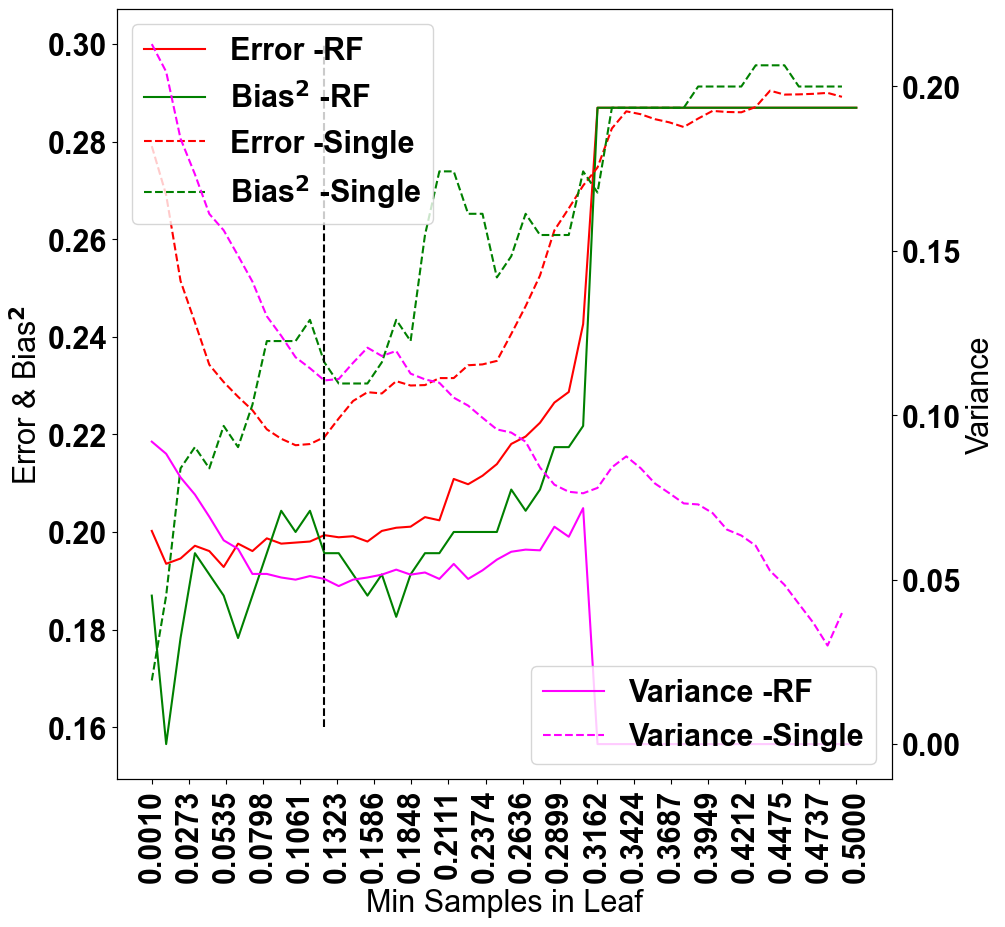

In [24]:
fig,ax1=plt.subplots()
fig.set_figwidth(10)
fig.set_figheight(10)
ax1.set_ylabel('Error & Bias${^2}$') 
ax1.set_xlabel('Min Samples in Leaf') 
ax1.plot(minlsbvrf.iloc[:,0],minlsbvrf.iloc[:,1],'-r')
ax1.plot(minlsbvrf.iloc[:,0],minlsbvrf.iloc[:,2],'-g')
ax1.plot(minlsbvbsplit.iloc[:-1,0],minlsbvbsplit.iloc[:-1,1],'--r')
ax1.plot(minlsbvbbsplit.iloc[:-1,0],minlsbvbbsplit.iloc[:-1,2],'--g')
ax1.set_xticks(np.linspace(0.001,0.5,20))
ax1.tick_params(axis='x',labelrotation=90)

ax2=ax1.twinx()
ax2.plot(minlsbvrf.iloc[:,0],minlsbvrf.iloc[:,3],color='magenta')
ax2.plot(minlsbvbsplit.iloc[:-1,0],minlsbvbsplit.iloc[:-1,3],linestyle='--',color='magenta')
ax2.set_ylabel('Variance') 
ax1.vlines(x=.12320408163265306,ymin=0.160,ymax=0.3,colors='k',linestyles='dashed')
ax1.legend(['Error -RF','Bias${^2}$ -RF','Error -Single','Bias${^2}$ -Single'],loc='upper left')
ax2.legend(['Variance -RF', 'Variance -Single'],loc='lower right')
plt.show()

In [25]:
dtree = RandomForestClassifier(random_state=RANDOM_SEED,criterion=criterion,min_samples_leaf=0.1232,n_estimators=100,max_features=4)

skf=StratifiedKFold(CV_VALIDATE_SPLIT,shuffle=True,random_state=RANDOM_SEED)
cv_fold=0
scores=[]

collect_vals_predictions = []

for tr,va in skf.split(train_x_df,train_y_df):

    dtree.fit(train_x_df[tr,:],train_y_df[tr])
    pred_test_y=dtree.predict(train_x_df[va,:])
    proba_test_y = dtree.predict_proba(train_x_df[va,:])

    Accuracy= 100*metrics.accuracy_score(train_y_df[va],pred_test_y)
    Recall=100*metrics.recall_score(train_y_df[va],pred_test_y)
    Precision= 100*metrics.precision_score(train_y_df[va],pred_test_y)
    FPR = 100*(1-metrics.recall_score(train_y_df[va],pred_test_y,pos_label=0))

    cv_fold=cv_fold+1

    print(f"Fold - {cv_fold}, Accuracy - {Accuracy}, Recall - {Recall}, Precision - {Precision}, FPR - {FPR}")
    collect_vals_predictions.append({'cv_fold':cv_fold,
                                    'validation':train_y_df[va].copy(),
                                    'model_prediction':pred_test_y,
                                    'model_probability':proba_test_y})
    scores.append([cv_fold, Accuracy, Recall, Precision, FPR])

# All the data
dtree.fit(train_x_df,train_y_df)
pred_test_y=dtree.predict(test_x_df)
proba_test_y = dtree.predict_proba(test_x_df)

Accuracy= 100*metrics.accuracy_score(test_y_df,pred_test_y)
Recall=100*metrics.recall_score(test_y_df,pred_test_y)
Precision= 100*metrics.precision_score(test_y_df,pred_test_y)
FPR = 100*(1-metrics.recall_score(test_y_df,pred_test_y,pos_label=0))

cv_fold=0

print(f"Fold - {cv_fold}, Accuracy - {Accuracy}, Recall - {Recall}, Precision - {Precision}, FPR - {FPR}")
collect_vals_predictions.append({'cv_fold':cv_fold,
                                'validation':test_y_df.copy(),
                                'model_prediction':pred_test_y,
                                'model_probability':proba_test_y})
scores.append([cv_fold, Accuracy, Recall, Precision, FPR])
scores=pd.DataFrame.from_records(scores,columns=['CV_Fold','Accuracy','Recall','Precision','FPR'])
scores.to_csv('MinLeafSizeBiasVarianceRF_features_4_Performance.csv')

Fold - 1, Accuracy - 71.29629629629629, Recall - 52.5, Precision - 63.63636363636363, FPR - 17.647058823529417
Fold - 2, Accuracy - 69.44444444444444, Recall - 51.21951219512195, Precision - 61.76470588235294, FPR - 19.402985074626866
Fold - 3, Accuracy - 74.07407407407408, Recall - 51.21951219512195, Precision - 72.41379310344827, FPR - 11.940298507462687
Fold - 4, Accuracy - 73.83177570093457, Recall - 52.5, Precision - 70.0, FPR - 13.432835820895528
Fold - 5, Accuracy - 75.70093457943925, Recall - 52.5, Precision - 75.0, FPR - 10.447761194029848
Fold - 0, Accuracy - 80.43478260869566, Recall - 60.60606060606061, Precision - 67.79661016949152, FPR - 11.585365853658535


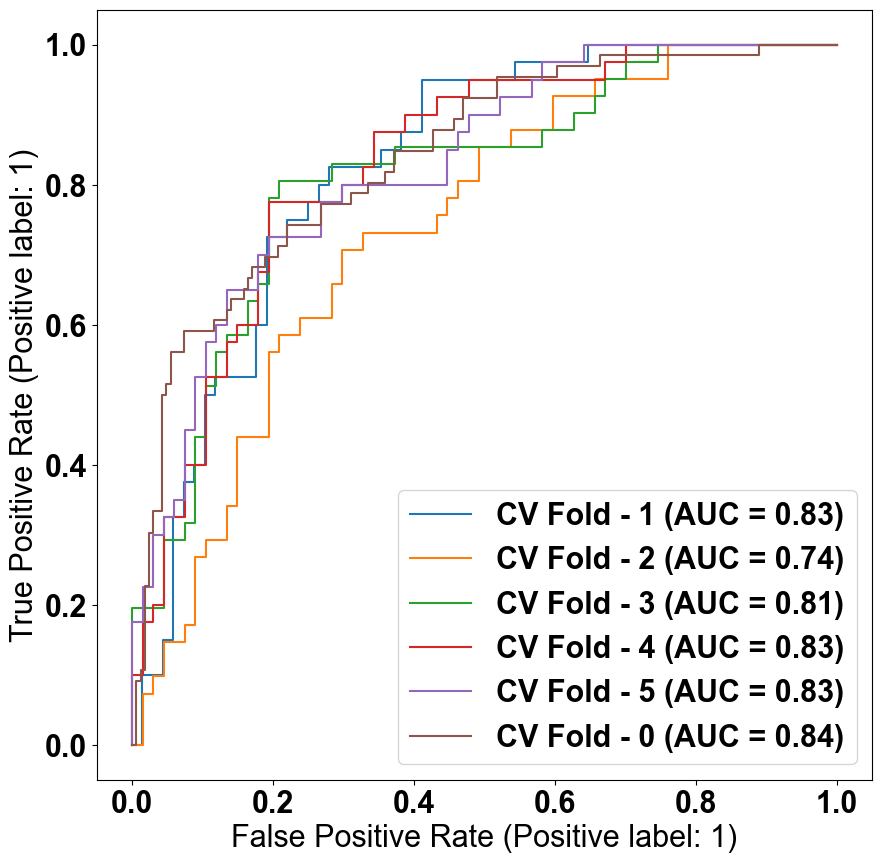

In [26]:
fig,ax=plt.subplots()
fig.set_figwidth(10)
fig.set_figheight(10)
leg=[]
for val in collect_vals_predictions:
    label='CV Fold - %d'%(val['cv_fold'])
    rocDisplay = metrics.RocCurveDisplay.from_predictions(val['validation'],
                                                          val['model_probability'][:,1],
                                                          name=label,
                                                          ax=ax)

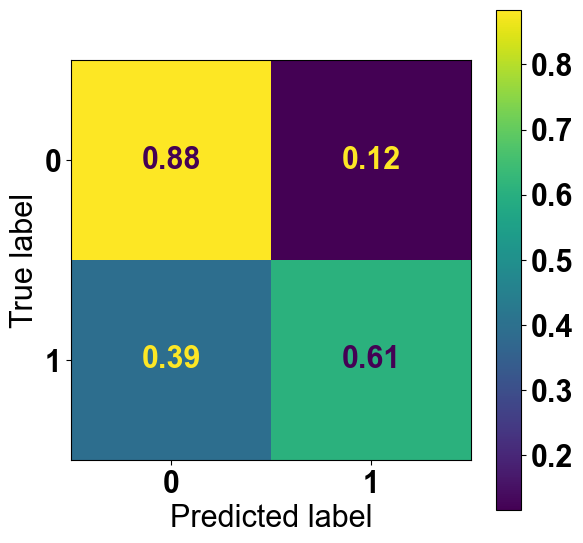

In [27]:
fig=plt.figure(figsize=[5,5])
ax = fig.add_axes([0,0,1,1])
metrics.ConfusionMatrixDisplay.from_predictions(test_y_df,pred_test_y,normalize='true',ax=ax)

In [28]:
dtree = RandomForestClassifier(random_state=RANDOM_SEED,criterion=criterion,min_samples_leaf=0.1232,n_estimators=100,max_features=7)

skf=StratifiedKFold(CV_VALIDATE_SPLIT,shuffle=True,random_state=RANDOM_SEED)
cv_fold=0
scores=[]

collect_vals_predictions = []

for tr,va in skf.split(train_x_df,train_y_df):

    dtree.fit(train_x_df[tr,:],train_y_df[tr])
    pred_test_y=dtree.predict(train_x_df[va,:])
    proba_test_y = dtree.predict_proba(train_x_df[va,:])

    Accuracy= 100*metrics.accuracy_score(train_y_df[va],pred_test_y)
    Recall=100*metrics.recall_score(train_y_df[va],pred_test_y)
    Precision= 100*metrics.precision_score(train_y_df[va],pred_test_y)
    FPR = 100*(1-metrics.recall_score(train_y_df[va],pred_test_y,pos_label=0))

    cv_fold=cv_fold+1

    print(f"Fold - {cv_fold}, Accuracy - {Accuracy}, Recall - {Recall}, Precision - {Precision}, FPR - {FPR}")
    collect_vals_predictions.append({'cv_fold':cv_fold,
                                    'validation':train_y_df[va].copy(),
                                    'model_prediction':pred_test_y,
                                    'model_probability':proba_test_y})
    scores.append([cv_fold, Accuracy, Recall, Precision, FPR])

# All the data
dtree.fit(train_x_df,train_y_df)
pred_test_y=dtree.predict(test_x_df)
proba_test_y = dtree.predict_proba(test_x_df)

Accuracy= 100*metrics.accuracy_score(test_y_df,pred_test_y)
Recall=100*metrics.recall_score(test_y_df,pred_test_y)
Precision= 100*metrics.precision_score(test_y_df,pred_test_y)
FPR = 100*(1-metrics.recall_score(test_y_df,pred_test_y,pos_label=0))

cv_fold=0

print(f"Fold - {cv_fold}, Accuracy - {Accuracy}, Recall - {Recall}, Precision - {Precision}, FPR - {FPR}")
collect_vals_predictions.append({'cv_fold':cv_fold,
                                'validation':test_y_df.copy(),
                                'model_prediction':pred_test_y,
                                'model_probability':proba_test_y})
scores.append([cv_fold, Accuracy, Recall, Precision, FPR])
scores=pd.DataFrame.from_records(scores,columns=['CV_Fold','Accuracy','Recall','Precision','FPR'])
scores.to_csv('MinLeafSizeBiasVarianceRF_features_7_Performance.csv')

Fold - 1, Accuracy - 74.07407407407408, Recall - 60.0, Precision - 66.66666666666666, FPR - 17.647058823529417
Fold - 2, Accuracy - 71.29629629629629, Recall - 56.09756097560976, Precision - 63.888888888888886, FPR - 19.402985074626866
Fold - 3, Accuracy - 74.07407407407408, Recall - 53.65853658536586, Precision - 70.96774193548387, FPR - 13.432835820895528
Fold - 4, Accuracy - 71.96261682242991, Recall - 47.5, Precision - 67.85714285714286, FPR - 13.432835820895528
Fold - 5, Accuracy - 77.57009345794393, Recall - 60.0, Precision - 75.0, FPR - 11.940298507462687
Fold - 0, Accuracy - 79.13043478260869, Recall - 62.121212121212125, Precision - 64.0625, FPR - 14.02439024390244


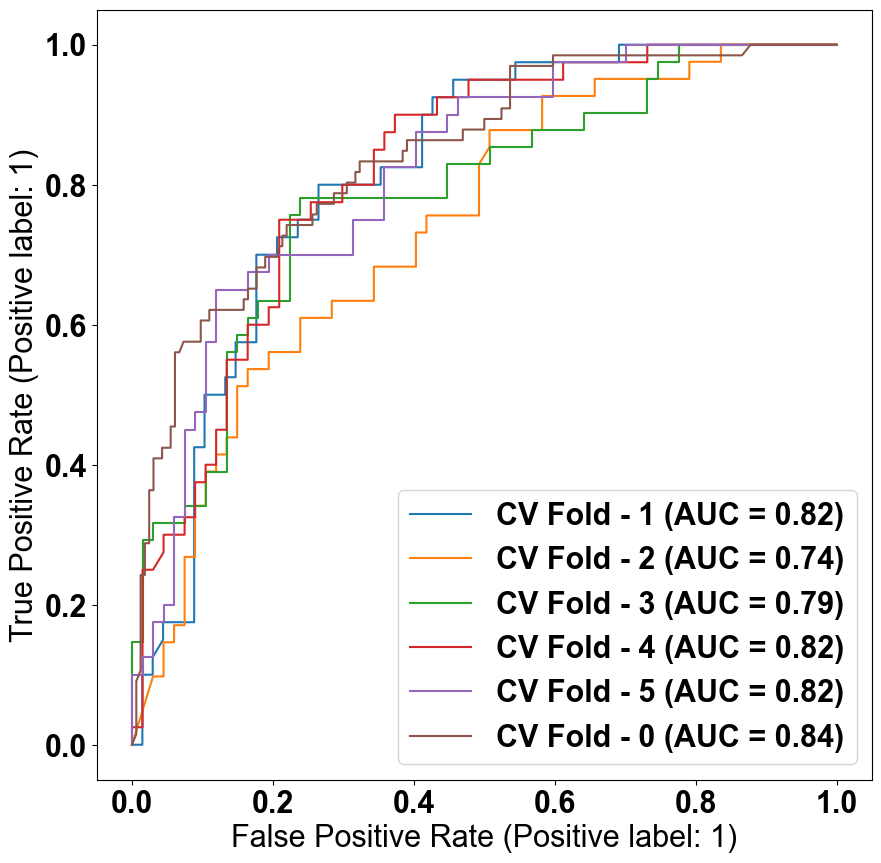

In [29]:
fig,ax=plt.subplots()
fig.set_figwidth(10)
fig.set_figheight(10)
leg=[]
for val in collect_vals_predictions:
    label='CV Fold - %d'%(val['cv_fold'])
    rocDisplay = metrics.RocCurveDisplay.from_predictions(val['validation'],
                                                          val['model_probability'][:,1],
                                                          name=label,
                                                          ax=ax)